# Klasifikasi Gambar dengan CNN

In [21]:
%pip install matplotlib tensorflow


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [23]:
print(type(x_train))
print(x_train.ndim)
print(x_train[0][0][0][0])
print(x_train[0][0][0])
print(x_train[0][0])
print(x_train[0])
print(x_train.shape)
print(x_test.shape)
# x_test, y_test = x_test
# print(f"Jumlah data train: {x_train.shape[0]}")
# print(f"Jumlah data test: {x_test.shape[0]}")

<class 'numpy.ndarray'>
4
59
[59 62 63]
[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [

In [24]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [25]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [26]:
model = models.Sequential()

In [27]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [29]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [30]:
model.add(layers.Flatten())

In [31]:
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))

In [32]:
model.add(layers.Dense(10, activation='softmax'))

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
print("Eager Execution:", tf.executing_eagerly())  # Harus True


Eager Execution: True


In [35]:
tf.config.run_functions_eagerly(True)

In [36]:
import numpy as np

x_train = np.array(list(x_train))
y_train = np.array(list(y_train))
x_test = np.array(list(x_test))
y_test = np.array(list(y_test))


In [37]:
import time

start_time = time.time()
history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))
end_time = time.time()

total_time = end_time - start_time
print(f'Total time for 1 epoch: {total_time:.2f} seconds')
print(f'Total training images: {x_train.shape[0]}')
print(f'Total testing images: {x_test.shape[0]}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 270s 346ms/step - accuracy: 0.3317 - loss: 1.7963 - val_accuracy: 0.5259 - val_loss: 1.3331
Total time for 1 epoch: 271.49 seconds
Total training images: 50000
Total testing images: 10000


In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - accuracy: 0.5320 - loss: 1.3216
Test accuracy: 0.5259


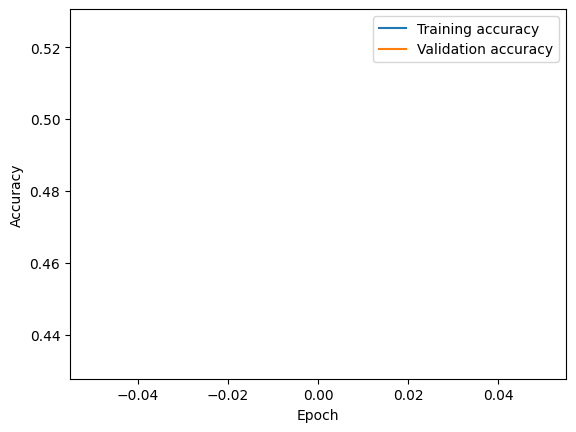

In [39]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

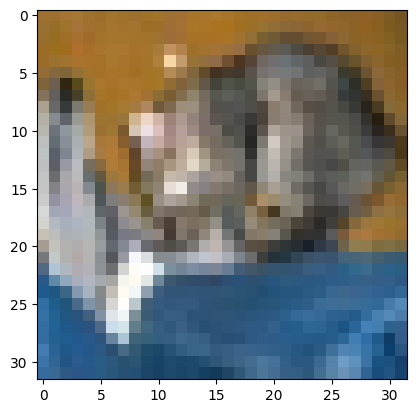

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted label: 5


In [40]:
import numpy as np

img = x_test[0]
plt.imshow(img)
plt.show()

img = np.expand_dims(img, axis=0)
predicted_class = model.predict(img)
predicted_label = np.argmax(predicted_class, axis=1)

print(f'Predicted label: {predicted_label[0]}')

Jika predicted label = 3 pada CIFAR-10, maka kategori gambar yang diprediksi adalah Cat (Kucing). Berikut urutan berdasarkan indexnya:
- 0: Airplane (Pesawat Terbang)
- 1: Automobile (Mobil)
- 2: Bird (Burung)
- 3: Cat (Kucing)
- 4: Deer (Rusa)
- 5: Dog (Anjing)
- 6: Frog (Katak)
- 7: Horse (Kuda)
- 8: Ship (Kapal)
- 9: Truck (Truk)